/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and b

Accuracy: 0.81
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.79      0.73      5778
           1       0.67      0.90      0.77      6330
           2       0.89      0.94      0.92      5869
           3       0.95      0.96      0.96      5969
           4       0.91      0.95      0.93      5619
           5       0.91      0.84      0.87      5190
           6       0.92      0.96      0.94      5705
           7       0.97      0.97      0.97      6139
           8       0.92      0.93      0.92      5633
           9       0.89      0.96      0.92      5686
          10       0.84      0.86      0.85      1062
          11       0.75      0.68      0.71       648
          12       0.71      0.84      0.77      1739
          13       0.85      0.74      0.79       779
          14       0.91      0.80      0.85       851
          15       0.74      0.82      0.78      1440
          16       0.86      0.70      0.7

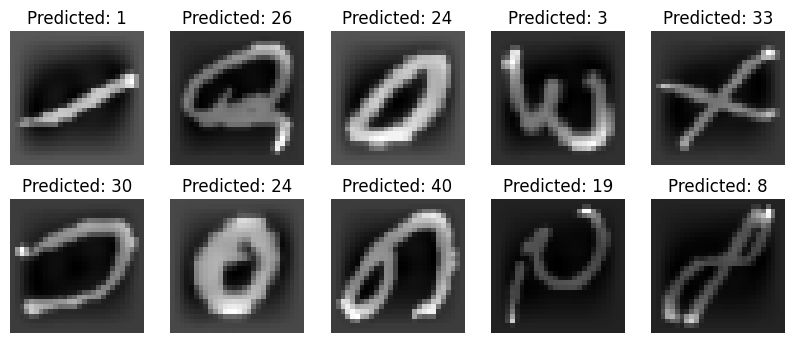

In [ ]:
import torch
import numpy as np
from torchvision import datasets, transforms
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Load the EMNIST ByClass dataset
train_dataset = datasets.EMNIST(root='./data', split='byclass', train=True, download=True, transform=transform)
test_dataset = datasets.EMNIST(root='./data', split='byclass', train=False, download=True, transform=transform)

# Create DataLoader for easier handling
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

# Extract data and labels from DataLoader
def extract_data_labels(loader):
    data, labels = [], []
    for batch in loader:
        data.append(batch[0].numpy().reshape(len(batch[0]), -1))
        labels.append(batch[1].numpy())
    return np.concatenate(data), np.concatenate(labels)

X_train, y_train = extract_data_labels(train_loader)
X_test, y_test = extract_data_labels(test_loader)

# Data preprocessing: Standardize pixel values
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train a simple Multi-Layer Perceptron (MLP) classifier
model = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report_result)

# Visualize some predictions
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test_scaled[i].reshape(28, 28), cmap='gray')
    plt.title(f'Predicted: {y_pred[i]}')
    plt.axis('off')
plt.show()
